# Crop Analysis From Realtime ESP8266 Data

Points to note
* This dataset is formed from realtime readings taken by the ESP8266 over 5 hours at a place.
* This has no correlation with the mentioned crop name and is just for testing purposes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('sens.csv')

In [3]:
data.head() #check if the csv is imported correctly

,temp,hum,pres,lux,uv,prec,label
0,23.93,45.29,1002.00,86.67,1,0,rice
1,23.84,45.14,1001.99,95.00,1,0,rice
2,24.06,52.90,1002.00,72.50,1,0,rice
3,24.06,45.29,1002.00,87.50,1,0,rice
4,24.03,45.17,1001.96,87.50,1,0,rice


In [4]:
data.shape

(618, 7)

In [5]:
data.describe() #some general info about the dataset

,temp,hum,pres,lux,uv,prec
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.0
mean,27.076375,45.992346,1002.314142,67.831650,0.360841,0.0
std,1.595208,2.734664,0.825672,24.813059,0.480634,0.0
min,23.840000,39.600000,1001.330000,3.330000,0.000000,0.0
25%,25.680000,44.462500,1001.572500,64.585000,0.000000,0.0
50%,26.890000,45.850000,1001.990000,72.500000,0.000000,0.0
75%,28.680000,47.570000,1003.067500,85.622500,1.000000,0.0
max,29.730000,62.620000,1004.140000,95.000000,1.000000,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    618 non-null    float64
 1   hum     618 non-null    float64
 2   pres    618 non-null    float64
 3   lux     618 non-null    float64
 4   uv      618 non-null    int64  
 5   prec    618 non-null    int64  
 6   label   618 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 33.9+ KB


In [7]:
data.isnull().sum() #checking for null

temp     0
hum      0
pres     0
lux      0
uv       0
prec     0
label    0
dtype: int64

In [8]:
data.apply(lambda x: len(x.unique())) #number of unique records per column

temp     309
hum      423
pres     220
lux       60
uv         2
prec       1
label      6
dtype: int64

In [9]:
data['label'].value_counts()

rice      103
wheat     103
mango     103
maize     103
cotton    103
banana    103
Name: label, dtype: int64

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

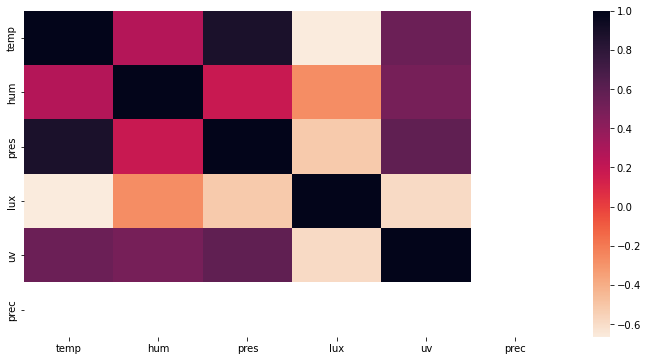

In [10]:
f,ax=plt.subplots(figsize=(12,6)) #checking correlation between data columns
corr=data.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r")

In [11]:
data.columns

Index(['temp', 'hum', 'pres', 'lux', 'uv', 'prec', 'label'], dtype='object')

C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


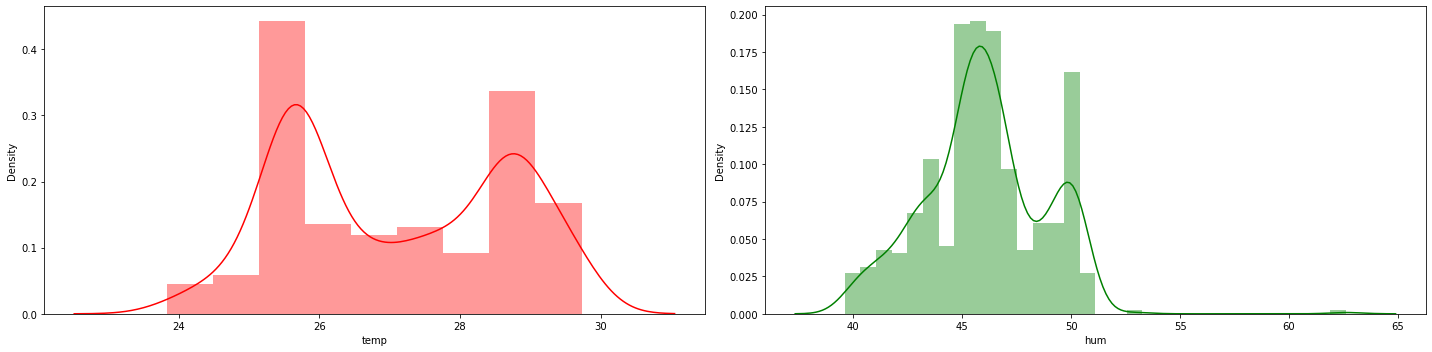

In [12]:
f= plt.figure(figsize=(20,5)) #plotting histograms of the data
ax=f.add_subplot(121)
sns.distplot(data['temp'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['hum'] , color ='green' , ax = ax)
plt.tight_layout()

C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


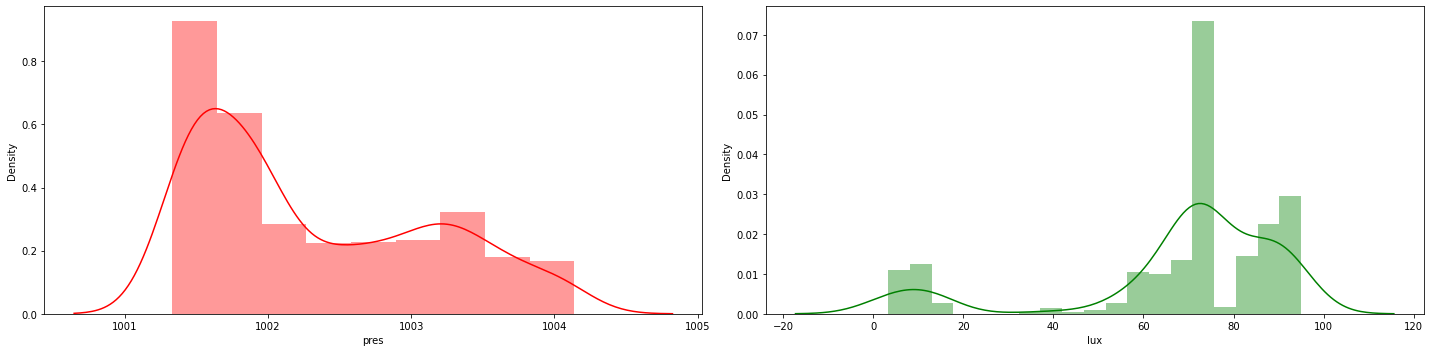

In [13]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['pres'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['lux'] , color ='green' , ax = ax)
plt.tight_layout()

C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


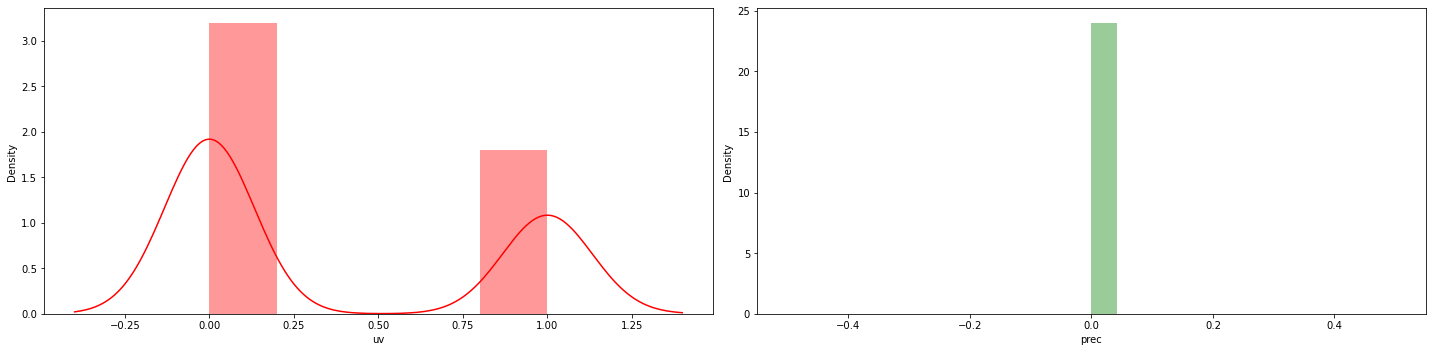

In [14]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['uv'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['prec'] , color ='green' , ax = ax)
plt.tight_layout()

C:\Users\Sayandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


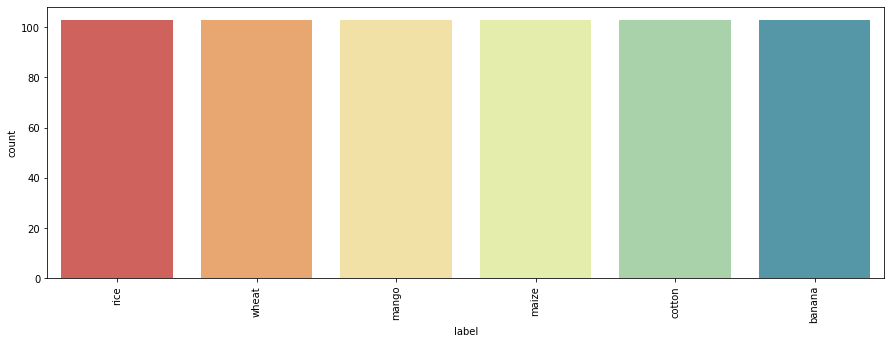

In [15]:
f= plt.figure(figsize=(15,5))
sns.countplot(data['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [16]:
X = data.drop('label' ,axis =1) #preparing dataset for Machine Learning

In [17]:
X.head()

,temp,hum,pres,lux,uv,prec
0,23.93,45.29,1002.00,86.67,1,0
1,23.84,45.14,1001.99,95.00,1,0
2,24.06,52.90,1002.00,72.50,1,0
3,24.06,45.29,1002.00,87.50,1,0
4,24.03,45.17,1001.96,87.50,1,0


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
data['label'] = le.fit_transform(data['label'])

In [21]:
data.head()

,temp,hum,pres,lux,uv,prec,label
0,23.93,45.29,1002.00,86.67,1,0,4
1,23.84,45.14,1001.99,95.00,1,0,4
2,24.06,52.90,1002.00,72.50,1,0,4
3,24.06,45.29,1002.00,87.50,1,0,4
4,24.03,45.17,1001.96,87.50,1,0,4


In [22]:
y = data['label']

In [23]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int32

# Train Test

In [24]:
model = []
accuracy = []

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT = DecisionTreeClassifier()

In [29]:
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [30]:
predict = DT.predict(X_test)

In [31]:
DT_accuracy = DT.score(X_test,y_test)

In [32]:
DT_accuracy

0.9758064516129032

In [33]:
accuracy.append(DT_accuracy)

In [34]:
model.append('Decision Tree')

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LG = LogisticRegression()

In [37]:
LG.fit(X_train , y_train)

C:\Users\Sayandeep\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
LG_accuracy = LG.score(X_test,y_test)

In [39]:
LG_accuracy

0.7258064516129032

In [40]:
accuracy.append(LG_accuracy)

In [41]:
model.append('Logistic Regression')

# RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
RF = RandomForestClassifier()

In [44]:
RF.fit(X_train , y_train)

RandomForestClassifier()

In [45]:
RF_accuracy = RF.score(X_test,y_test)

In [46]:
RF_accuracy

0.9758064516129032

In [47]:
accuracy.append(RF_accuracy)
model.append('Random Forest')

In [48]:
model

['Decision Tree', 'Logistic Regression', 'Random Forest']

In [49]:
accuracy

[0.9758064516129032, 0.7258064516129032, 0.9758064516129032]

<AxesSubplot:>

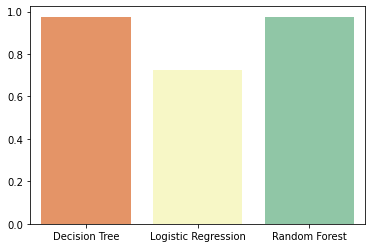

In [50]:
sns.barplot(x = model , y = accuracy ,palette ='Spectral')

In [51]:
# Test123

In [52]:
import seaborn as sns
data = pd.read_csv('sens.csv')

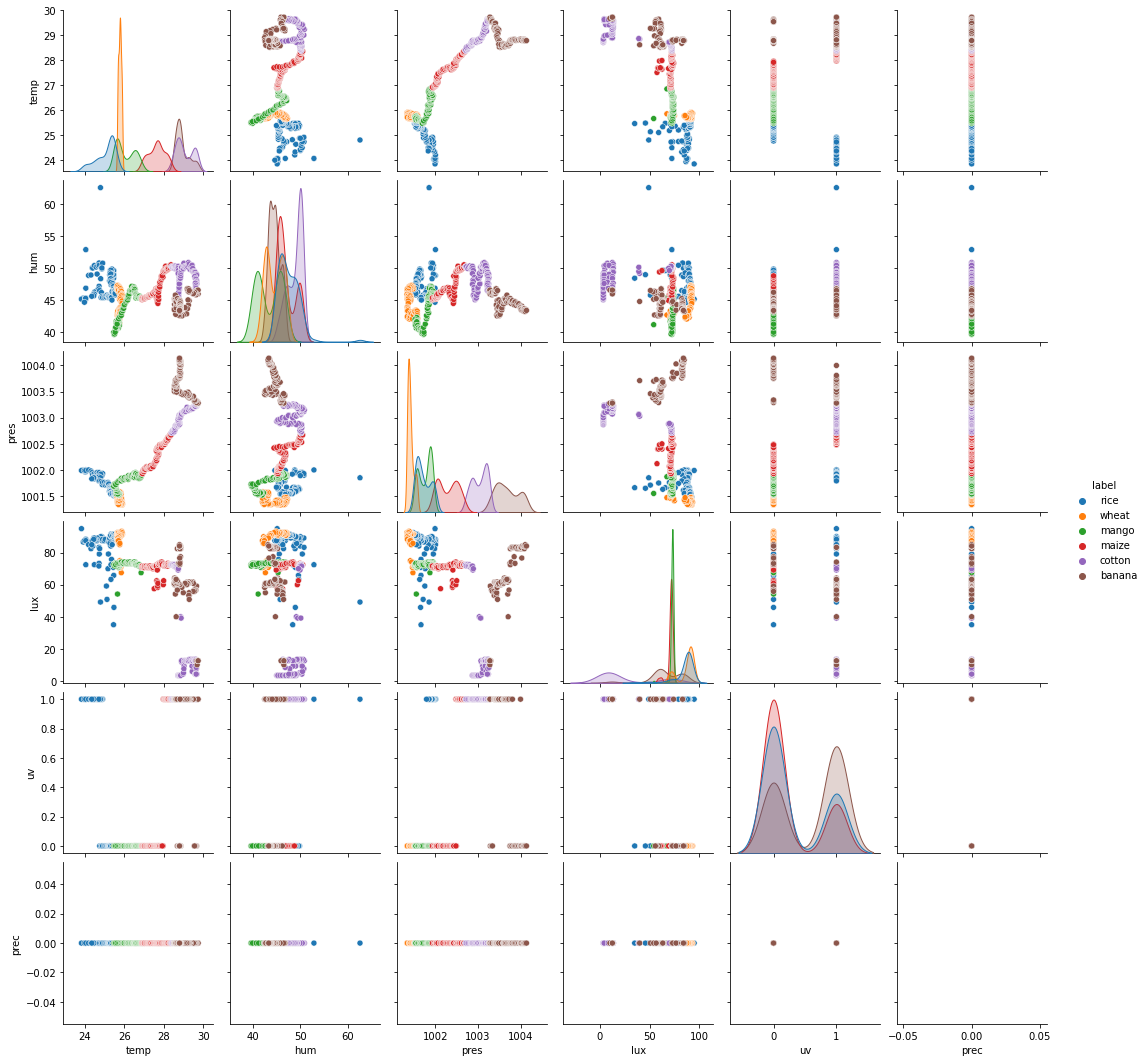

In [53]:
sns.pairplot(data, hue = 'label')